## Segmentación y detección de anomalías en pacientes crónicos.

### Objetivo:

Aplicar técnicas avanzadas de aprendizaje no supervisado para identificar grupos def pacientes con condiciones clínicas similares, visualizar dichos segmentos en espacios de baja dimensión, detectar perfiles atípìcos y analizar comparativamente distintos m,étodos de agrupamiento. Los estudiantes implmentarán modelos de clustering como K-ÇMeans, DBSCAN o jerárquicos, emplearán técnicas de reducción de dimensionalidad cmo PCA o t-SNE para representar los resultados, y justificarán sus decisiones en función del contexto clínico y los resultados obtenidos.

---

### Importaciones

Este conjunto de importaciones en Python configura un entorno robusto para análisis exploratorio avanzado, reducción de dimensionalidad, detección de anomalías y clustering no supervisado, apoyado por visualización detallada y manipulación eficiente de datos. La combinación de herramientas como **Pandas**, **Scikit-learn**, **UMAP**, **t-SNE** y **Seaborn** permite explorar estructuras latentes en conjuntos de datos complejos, evaluar la cohesión de agrupamientos y detectar outliers, todo con visualizaciones claras y resultados reproducibles.

### Manipulación y preprocesamiento de datos

* `pandas` (`pd`) es la biblioteca principal para manipulación de datos tabulares. Permite cargar, explorar, transformar y limpiar datasets estructurados con gran flexibilidad.
* `numpy` es la base del cómputo numérico en Python, facilitando operaciones vectorizadas, creación de arreglos, y transformaciones matemáticas rápidas.
* `StandardScaler` de `sklearn.preprocessing` estandariza las características del conjunto de datos para que tengan media cero y desviación estándar uno, lo cual es esencial para técnicas sensibles a la escala como PCA, t-SNE, UMAP y SVM.

### Reducción de dimensionalidad

* `PCA` (Análisis de Componentes Principales) reduce la dimensionalidad reteniendo la mayor parte de la varianza explicada, útil tanto para preprocesamiento como para visualización.
* `TSNE` (t-distributed Stochastic Neighbor Embedding) de `sklearn.manifold` es una técnica no lineal potente para visualizar datos en 2D o 3D, capturando relaciones locales complejas entre muestras.
* `umap` (Uniform Manifold Approximation and Projection) es una técnica moderna de reducción no lineal que busca preservar tanto la estructura local como global, generalmente más rápida que t-SNE y mejor escalable a grandes volúmenes de datos.

### Clustering no supervisado

* `DBSCAN` (Density-Based Spatial Clustering of Applications with Noise) agrupa puntos densamente conectados, detectando simultáneamente outliers sin necesidad de especificar el número de clusters.
* `HDBSCAN` es una extensión jerárquica de DBSCAN que ajusta automáticamente la densidad mínima requerida para formar clusters, siendo más robusta ante ruido y clusters con diferentes densidades.

### Detección de anomalías

* `IsolationForest` es un algoritmo basado en árboles aleatorios que identifica outliers como puntos más fáciles de aislar en divisiones recursivas.
* `OneClassSVM` entrena un modelo de frontera que encapsula la mayoría de las muestras, útil cuando se tiene un solo tipo de clase "normal" y se desea detectar desviaciones.

### Evaluación de agrupamientos

* `silhouette_score` y `davies_bouldin_score` de `sklearn.metrics` proporcionan métricas cuantitativas para evaluar la calidad de los clusters, considerando cohesión interna y separación entre grupos.

### Visualización

* `matplotlib.pyplot` es la herramienta base de visualización en Python, ideal para gráficos personalizados de dispersión, clusters y proyecciones en 2D.
* `seaborn` extiende matplotlib con estilos visuales atractivos y funciones de alto nivel para visualizaciones estadísticas, facilitando gráficos como mapas de calor, violin plots o distribuciones conjuntas.

### Descarga de datos

* `kagglehub` permite descargar de forma directa datasets alojados en Kaggle Hub, simplificando el acceso a recursos listos para análisis sin necesidad de autenticaciones manuales.

### Gestión de advertencias

* `warnings.filterwarnings("ignore")` silencia mensajes de advertencia que pueden saturar la consola durante la experimentación, especialmente útil al trabajar con modelos complejos o técnicas que generan alertas benignas en tiempo de ejecución.

---

En conjunto, estas importaciones ofrecen un ecosistema completo para realizar análisis exploratorio no supervisado con capacidad de detección de outliers, reducción avanzada de dimensionalidad y evaluación de agrupamientos, todo ello complementado con visualización de calidad y acceso directo a datos desde la nube.


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import warnings

warnings.filterwarnings("ignore")

## Importar datos desde 'kagglehub'

La función `importar_dataset` está diseñada para **descargar e importar automáticamente** el conjunto de datos de diabetes desde Kaggle, utilizando la utilidad `kagglehub`. Este dataset contiene registros clínicos asociados al diagnóstico de diabetes, y es ampliamente usado en tareas de aprendizaje supervisado, especialmente en problemas de clasificación binaria.

Este paso es fundamental en cualquier flujo de trabajo de ciencia de datos, ya que garantiza que los datos provengan de una fuente confiable y estandarizada, y que estén disponibles en un formato adecuado (`DataFrame de pandas`) para su posterior análisis, visualización y modelado.

---

### Parámetros de entrada

La función no recibe parámetros externos. Toda la lógica está encapsulada para automatizar la descarga e importación del dataset.

---

### Lógica interna

1. **Descarga del dataset desde Kaggle**:
   Utiliza `kagglehub.dataset_download("mathchi/diabetes-data-set")` para descargar el conjunto de datos de manera local. Esta acción se encarga de acceder al repositorio alojado en Kaggle, verificar la disponibilidad del archivo y almacenar su contenido en una ruta temporal o predeterminada del sistema.

2. **Lectura del archivo CSV**:
   Una vez descargado, se accede directamente al archivo `diabetes.csv` utilizando `pd.read_csv()`, lo que convierte el contenido del archivo en un `DataFrame`, estructura ideal para la manipulación de datos en Python.

3. **Retorno del DataFrame**:
   El DataFrame resultante, que contiene los datos crudos del conjunto de diabetes, se retorna para ser usado directamente en análisis exploratorio, preprocesamiento o entrenamiento de modelos.

---

### Aplicaciones comunes

* **Carga rápida de datos reales para pruebas de modelos de clasificación**.
* **Entrenamiento de algoritmos de machine learning supervisado**, donde el objetivo es predecir si una persona padece o no diabetes en base a características clínicas.
* **Análisis exploratorio de datos médicos**, para detectar patrones, correlaciones y características relevantes en pacientes.

---

### Ventajas de la función

* **Automatización del proceso de descarga**: no requiere pasos manuales ni intervención del usuario para obtener el dataset desde Kaggle.
* **Integración directa con pandas**: retorna el archivo ya convertido en un `DataFrame`, lo que permite usarlo inmediatamente en cualquier pipeline.
* **Reproducibilidad**: al utilizar una fuente pública y bien definida (`mathchi/diabetes-data-set` en Kaggle), se asegura que los resultados puedan ser replicados fácilmente por otros usuarios o equipos.
* **Simplicidad y eficiencia**: el código es breve y directo, pero cumple con una tarea crítica en el flujo de trabajo de data science.

---

### Consideraciones adicionales

* Para que la función funcione correctamente, es necesario haber configurado previamente el acceso a Kaggle mediante `kagglehub` o una autenticación similar.
* Puede ser extendida fácilmente para permitir la elección de rutas de descarga, múltiples formatos de archivo o datasets alternativos desde Kaggle.
* Es ideal para proyectos educativos, prototipos rápidos o pruebas de conceptos en modelos de clasificación binaria aplicada a datos de salud.

In [11]:
def importar_dataset():
    """
    Importa el dataset diabetes.csv desde Kaggle.
    """
    path = kagglehub.dataset_download("mathchi/diabetes-data-set")
    print("Path to dataset files:", path)
    df = pd.read_csv(f"{path}/diabetes.csv")
    return df

### Preprocesamiento de datos

La función `preprocesar_datos` tiene como propósito **escalar numéricamente** las características contenidas en un `DataFrame` utilizando la técnica de estandarización mediante `StandardScaler`. Este tipo de preprocesamiento es esencial en modelos de machine learning que son sensibles a la escala de las variables, como los métodos basados en distancia (SVM, KNN) o los algoritmos de gradiente (redes neuronales, regresión logística).

Estandarizar significa transformar cada variable para que tenga **media cero y desviación estándar uno**, lo que garantiza una distribución más uniforme y evita que las variables con mayor rango dominen el comportamiento del modelo.

---

### Parámetros de entrada

* `df`: `DataFrame` de pandas  
  Conjunto de datos numéricos que se desea escalar. Puede contener todas las columnas de entrada necesarias para el entrenamiento de un modelo.

---

### Lógica interna

1. **Instanciación del escalador**:  
   Se crea un objeto `StandardScaler()` desde `sklearn.preprocessing`. Este escalador calcula la media y la desviación estándar de cada columna al ajustarse (`fit`), y luego transforma los datos para que se ajusten a la escala estándar.

2. **Ajuste y transformación de los datos**:  
   El método `fit_transform(df)` se aplica directamente sobre el `DataFrame` para obtener un array de datos escalados. Cada valor es transformado según la fórmula:  
   $$
   z = \frac{x - \mu}{\sigma}
   $$
   donde $( \mu )$ es la media de la característica y $( \sigma )$ su desviación estándar, lo que en estadística se conoce como **"estandarización"** y no se debe confundir con **"normalización"**.

3. **Retorno**:  
   La función retorna dos objetos:
   - `df_escalado`: matriz de NumPy con los datos ya estandarizados.
   - `scaler`: el objeto escalador entrenado, útil para aplicar la misma transformación a nuevos datos en fase de prueba o producción.

---

### Aplicaciones comunes

* **Preparación de datos para modelos de machine learning**, especialmente cuando se usan algoritmos sensibles al escalado.
* **Preprocesamiento previo a la validación cruzada** o ajuste de hiperparámetros, donde mantener la coherencia en la escala es crítico.
* **Transformación de datos antes de hacer predicciones** en aplicaciones reales donde se deben aplicar las mismas estadísticas de entrenamiento.

---

### Ventajas de la función

* Asegura que todas las variables tengan una influencia comparable en el modelo.
* Facilita la convergencia de algoritmos de optimización basados en gradientes.
* Retorna el escalador entrenado, permitiendo **reutilizar** la transformación en datos futuros sin recalcular la media o desviación.
* Modular y simple, ideal para integrarse dentro de un pipeline más complejo.

---

### Consideraciones adicionales

* La función asume que todas las columnas del `DataFrame` son numéricas. En caso de contener variables categóricas, estas deben ser codificadas antes de aplicar esta función.
* Puede ser fácilmente modificada para devolver los datos como `DataFrame` en lugar de array, manteniendo los nombres de las columnas originales para mayor trazabilidad.


In [12]:
def preprocesar_datos(df):
    """
    Escala los datos usando StandardScaler
    """
    scaler = StandardScaler()
    df_escalado = scaler.fit_transform(df)
    return df_escalado, scaler

## Reducción de dimensionalidad

La función `reducir_dimensionalidad` tiene como propósito **proyectar datos multivariantes en un espacio bidimensional**, utilizando tres de las técnicas más populares de reducción de dimensionalidad: **PCA, t-SNE y UMAP**. Según mi investigación personal, esta estrategia es ampliamente usada en análisis exploratorio, especialmente cuando se busca **visualizar datos complejos en 2D**, preservando en lo posible las relaciones estructurales entre las observaciones.

Aunque la función se centra en la visualización, internamente aplica transformaciones matemáticas que permiten observar agrupaciones, separaciones o patrones latentes que no serían evidentes en dimensiones más altas.

---

### Parámetros de entrada

* `datos_escalados`: array o matriz NumPy  
  Conjunto de datos numéricos previamente estandarizados (por ejemplo, con `StandardScaler`). Es fundamental que los datos hayan sido normalizados antes de aplicar estas técnicas, ya que algoritmos como t-SNE y PCA son sensibles a las magnitudes relativas de las variables.

---

### Lógica interna

1. **Reducción con PCA (Análisis de Componentes Principales)**:  
   Se aplica `PCA(n_components=2)` para proyectar los datos en un plano cartesiano que **maximiza la varianza explicada**. PCA es una técnica lineal que busca identificar las direcciones principales de dispersión de los datos. Se grafica el resultado con `sns.scatterplot`.

2. **Reducción con t-SNE (t-Distributed Stochastic Neighbor Embedding)**:  
   Utiliza `TSNE(n_components=2)` para mapear los datos en dos dimensiones, conservando principalmente las **relaciones locales** entre observaciones. t-SNE es ideal para detectar grupos o subestructuras, aunque puede distorsionar distancias globales. Se fija `random_state` para reproducibilidad y se muestra la proyección en el segundo gráfico.

3. **Reducción con UMAP (Uniform Manifold Approximation and Projection)**:  
   Aplica `UMAP(n_components=2)` como una técnica no lineal que busca **preservar tanto la estructura local como global**. Es más rápida que t-SNE y escala mejor con conjuntos grandes. Se genera un tercer gráfico de dispersión para visualizar su resultado.

4. **Visualización conjunta**:  
   Se crea una figura de 1 fila y 3 columnas para mostrar en paralelo las tres técnicas, facilitando la **comparación visual directa**. Cada técnica puede revelar distintos aspectos de la estructura de los datos.

5. **Retorno**:  
   La función retorna una tupla con los tres resultados proyectados: `datos_pca`, `datos_tsne` y `datos_umap`, lo que permite **seguir utilizándolos** para análisis adicionales, clustering o interpretación posterior.

---

### Aplicaciones comunes

* **Visualización de datos de alta dimensión**, como embeddings, características extraídas o vectores codificados.
* **Exploración de estructuras latentes o patrones ocultos** en datasets no etiquetados.
* **Comparación de técnicas de reducción** para elegir la más informativa en un problema específico.
* **Paso previo a algoritmos de clustering**, como KMeans o DBSCAN, para análisis más efectivos.

---

### Ventajas de la función

* Permite aplicar y comparar tres métodos de reducción con una sola llamada.
* Genera visualizaciones claras y comparativas en una misma figura.
* Compatible con cualquier conjunto de datos numéricos ya escalados.
* Devuelve los resultados transformados, lo que habilita análisis posteriores sin recalcular.

---

### Consideraciones adicionales

* La interpretación de los ejes en PCA es matemática (direcciones de máxima varianza), pero en t-SNE y UMAP no tiene un significado geométrico directo.
* t-SNE y UMAP pueden tardar más que PCA y su resultado puede variar según parámetros como `perplexity` o `n_neighbors`.
* Es recomendable etiquetar los puntos o colorearlos por clases si se cuenta con etiquetas, para facilitar la interpretación de los patrones visuales.


In [13]:
def reducir_dimensionalidad(datos_escalados):
    """
    Aplica PCA, t-SNE y UMAP y visualiza los resultados.
    """
    # Si los datos son una matriz dispersa, conviértela a array denso
    if hasattr(datos_escalados, "toarray"):
        datos_escalados = datos_escalados.toarray()

    # PCA
    pca = PCA(n_components=2)
    datos_pca = pca.fit_transform(datos_escalados)
    datos_pca = np.array(datos_pca)
    plt.figure(figsize=(21, 7))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=datos_pca[:, 0], y=datos_pca[:, 1], alpha=0.5)
    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=30)
    datos_tsne = tsne.fit_transform(datos_escalados)
    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=30)
    datos_tsne = tsne.fit_transform(datos_escalados)
    datos_tsne = np.array(datos_tsne)
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=datos_tsne[:, 0], y=datos_tsne[:, 1], alpha=0.5)
    # UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    datos_umap = reducer.fit_transform(datos_escalados)
    datos_umap = np.array(datos_umap)
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=datos_umap[:, 0], y=datos_umap[:, 1], alpha=0.5)
    plt.title("Visualización con UMAP")

    plt.tight_layout()
    plt.show()

    return datos_pca, datos_tsne, datos_umap

### Optimización de hiperparámetros para DBSCAN

La función `optimizar_dbscan_eps_min_samples` tiene como objetivo encontrar los **valores óptimos de los hiperparámetros** `eps` y `min_samples` para el algoritmo de clustering no supervisado **DBSCAN**. Esta optimización se realiza evaluando distintas combinaciones de parámetros y seleccionando aquella que produce la mejor cohesión entre los grupos resultantes, medida mediante el **índice de silueta**.

Dado que DBSCAN no requiere especificar el número de clusters de antemano, esta función es esencial para ajustarlo adecuadamente y evitar resultados triviales o poco informativos (como generar un solo cluster o marcar todos los puntos como ruido).

---

### Parámetros de entrada

* `X_scaled`: `array` o `matriz` de características escaladas  
  Es el conjunto de datos sobre el cual se aplicará DBSCAN. Debe estar previamente **escalado o normalizado**, ya que este algoritmo es sensible a la escala de los datos.

---

### Lógica interna

1. **Definición de la búsqueda**:  
   Se establece un rango logarítmico de posibles valores para `eps` (`np.logspace(-1, 1.5, 15)`) y un rango lineal para `min_samples` (`range(10, 20)`). Esto permite explorar una variedad amplia de configuraciones, desde más conservadoras a más permisivas.

2. **Iteración sobre combinaciones**:  
   Para cada par (`eps`, `min_samples`), se ajusta un modelo DBSCAN y se generan etiquetas de cluster mediante `fit_predict()`.

3. **Validación del número de clusters**:  
   Se ignoran las combinaciones que producen **0 o 1 cluster válido**, ya que no tienen sentido desde el punto de vista del agrupamiento.

4. **Evaluación del desempeño**:  
   Para combinaciones válidas, se calcula el **índice de silueta**, el cual mide qué tan bien se separan los clusters entre sí. Cuanto más alto, mejor.

5. **Actualización del mejor score**:  
   Si una combinación supera el `mejor_score` actual, se guarda como la nueva mejor opción.

6. **Visualización del resultado óptimo**:  
   Se imprime el valor de `eps` y `min_samples` que generó la mejor cohesión entre clusters según el índice de silueta.

7. **Retorno**:  
   La función retorna una tupla con los **mejores valores encontrados** (`eps`, `min_samples`) para ser utilizados posteriormente al instanciar el modelo DBSCAN definitivo.

---

### Aplicaciones comunes

* **Ajuste automático de DBSCAN** en tareas exploratorias de clustering no supervisado.
* **Evaluación comparativa de configuraciones**, especialmente útil cuando no se conoce el número de grupos en los datos.
* **Análisis de patrones en datasets no etiquetados**, como agrupamiento de clientes, segmentación geográfica o detección de anomalías.

---

### Ventajas de la función

* Permite encontrar valores efectivos de `eps` y `min_samples` sin intervención manual.
* Utiliza una métrica sólida (`silhouette_score`) para evaluar la calidad del clustering.
* Filtra resultados triviales (como un solo cluster), asegurando que los resultados tengan sentido práctico.
* Retorna una tupla fácilmente integrable en cualquier pipeline de clustering.

---

### Consideraciones adicionales

* Es recomendable ejecutar esta función sobre datos **normalizados**, por ejemplo, con `StandardScaler` o `MinMaxScaler`.
* Puede ser extendida para guardar todos los resultados y generar un **heatmap de silueta** como guía visual.
* No se recomienda usar en datasets extremadamente grandes sin optimización, ya que el número de combinaciones puede hacer crecer rápidamente el tiempo de cómputo.


In [14]:
def optimizar_dbscan_eps_min_samples(X_scaled):
    # Rango de búsqueda
    eps_values = np.logspace(-1, 1.5, 15)
    min_samples_values = range(10, 20)
    mejor_score = -1
    mejores_params = (None, None)

    for eps in eps_values:
        for min_samples in min_samples_values:
            modelo = DBSCAN(eps=eps, min_samples=min_samples)
            etiquetas = modelo.fit_predict(X_scaled)
            n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)

            # Evita calcular con 0 o 1 cluster
            if n_clusters <= 1:
                continue

            score = silhouette_score(X_scaled, etiquetas)
            if score > mejor_score:
                mejor_score = score
                mejores_params = (eps, min_samples)

    print(
        f"Mejores parámetros DBSCAN:\neps = {mejores_params[0]:.3f}\nmin_samples = {mejores_params[1]}"
    )
    return mejores_params

### Segmentación y evaluación con DBSCAN y HDBSCAN

La función `segmentar_dbscan_hdbscan` permite aplicar dos algoritmos de **clustering no supervisado** (DBSCAN y HDBSCAN) sobre un conjunto de datos previamente reducido en dimensionalidad (por ejemplo, mediante PCA o t-SNE). Además de realizar la segmentación, la función visualiza los resultados y evalúa la calidad de los clústeres generados usando métricas cuantitativas estándar.

Este enfoque comparativo es útil cuando se trabaja con datos no etiquetados, y se desea identificar estructuras o patrones sin necesidad de definir un número fijo de grupos. También permite determinar cuál de los dos métodos produce mejores agrupamientos en términos de cohesión y separación entre clústeres.

---

### Parámetros de entrada

* `datos_reducidos`: `array` o `matriz` de 2 dimensiones  
  Representa los datos proyectados en un espacio de baja dimensionalidad (usualmente 2D o 3D), listos para aplicar clustering visual y computacional. Es crucial que hayan sido escalados y reducidos previamente.

---

### Lógica interna

1. **Optimización y aplicación de DBSCAN**  
   Se llama a la función `optimizar_dbscan_eps_min_samples` para encontrar los mejores valores de `eps` y `min_samples`. Luego, se ajusta un modelo `DBSCAN` con esos hiperparámetros y se generan las etiquetas (`etiquetas_dbscan`) que asignan cada punto a un clúster o lo marcan como ruido (`-1`).

2. **Aplicación de HDBSCAN**  
   Se ajusta un modelo `HDBSCAN` con `min_cluster_size=5`, valor adecuado para detectar clústeres pequeños sin sobresegmentar. Se generan las etiquetas (`etiquetas_hdbscan`) del agrupamiento.

3. **Visualización comparativa**  
   Se generan dos gráficos de dispersión (`scatterplot`) uno al lado del otro:
   - A la izquierda: clústeres obtenidos con DBSCAN.
   - A la derecha: clústeres obtenidos con HDBSCAN.  
   Se utiliza una paleta de colores (`viridis`) y leyendas completas para facilitar la interpretación.

4. **Evaluación de DBSCAN**  
   Si el número de clústeres es mayor a 1 y no todos los puntos son considerados ruido, se calcula:
   - **Índice de Silueta**: mide la cohesión intra-cluster y la separación inter-cluster.
   - **Índice de Davies-Bouldin**: evalúa la compacidad y separación de los clústeres (valores bajos son mejores).

5. **Evaluación de HDBSCAN**  
   Se filtran los puntos clasificados como ruido (`-1`). Si hay más de un clúster válido, se calculan los mismos dos índices de evaluación que para DBSCAN.

6. **Retorno**  
   Se devuelven dos vectores: `etiquetas_dbscan` y `etiquetas_hdbscan`, correspondientes a las asignaciones de clúster para cada algoritmo.

---

### Aplicaciones comunes

* **Comparación visual y cuantitativa de algoritmos de clustering**.
* **Segmentación de datos sin etiquetas previas**, como en marketing, bioinformática, análisis de comportamiento o detección de anomalías.
* **Selección del método más adecuado** en función del tipo y distribución de los datos.
* **Exploración de estructura interna en espacios reducidos**, como t-SNE o PCA, especialmente útil en análisis exploratorio.

---

### Ventajas de la función

* Integra optimización automática para DBSCAN.
* Permite comparar dos técnicas robustas para clustering sin necesidad de definir `n_clusters`.
* Visualización clara y rápida para interpretar los resultados.
* Evaluación cuantitativa usando métricas aceptadas (Silueta y Davies-Bouldin).
* Código modular, reutilizable y fácilmente ampliable con más algoritmos o visualizaciones.

---

### Consideraciones adicionales

* Requiere que los datos estén previamente **escalados y reducidos en dimensionalidad** (por ejemplo con PCA, UMAP o t-SNE).
* HDBSCAN puede identificar clústeres de distintas densidades, mientras que DBSCAN puede fallar en esas situaciones.
* Se puede extender la función para incluir curvas de evaluación, matriz de distancias o graficar puntos de ruido de forma diferenciada.
* Puede integrarse en pipelines más amplios de análisis no supervisado o semisupervisado.

In [15]:
def segmentar_dbscan_hdbscan(datos_reducidos):
    """
    Aplica DBSCAN y HDBSCAN, visualiza y evalúa la calidad de los clústeres.
    """
    # DBSCAN
    eps, min_samples = optimizar_dbscan_eps_min_samples(datos_reducidos)
    # Si los parámetros son None, asigna valores por defecto
    if eps is None:
        eps = 0.5
    if min_samples is None:
        min_samples = 10

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    etiquetas_dbscan = dbscan.fit_predict(datos_reducidos)

    # HDBSCAN
    hdbscan_clusterer = HDBSCAN(min_cluster_size=5)
    etiquetas_hdbscan = hdbscan_clusterer.fit_predict(datos_reducidos)

    # Visualización
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=datos_reducidos[:, 0],
        y=datos_reducidos[:, 1],
        hue=etiquetas_dbscan,
        palette="viridis",
        legend="full",
    )
    plt.title("Clústeres con DBSCAN")

    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=datos_reducidos[:, 0],
        y=datos_reducidos[:, 1],
        hue=etiquetas_hdbscan,
        palette="viridis",
        legend="full",
    )
    plt.title("Clústeres con HDBSCAN")

    plt.tight_layout()
    plt.show()

    # Evaluación de DBSCAN
    if len(set(etiquetas_dbscan)) > 1 and -1 not in etiquetas_dbscan:
        silueta_dbscan = silhouette_score(datos_reducidos, etiquetas_dbscan)
        davies_bouldin_dbscan = davies_bouldin_score(datos_reducidos, etiquetas_dbscan)
        print(
            f"DBSCAN - Índice de Silueta: {silueta_dbscan:.2f}, Davies-Bouldin: {davies_bouldin_dbscan:.2f}"
        )
    else:
        print(
            "DBSCAN - No se pueden calcular métricas de evaluación (pocos clústeres o todos los puntos son ruido)."
        )

    # Evaluación de HDBSCAN
    # if len(set(etiquetas_hdbscan)) > 1 and -1 not in etiquetas_hdbscan:
    etiquetas_validas = etiquetas_hdbscan[etiquetas_hdbscan != -1]
    if len(set(etiquetas_validas)) > 1:

        silueta_hdbscan = silhouette_score(datos_reducidos, etiquetas_hdbscan)
        davies_bouldin_hdbscan = davies_bouldin_score(
            datos_reducidos, etiquetas_hdbscan
        )
        print(
            f"HDBSCAN - Índice de Silueta: {silueta_hdbscan:.2f}, Davies-Bouldin: {davies_bouldin_hdbscan:.2f}"
        )
    else:
        print(
            "HDBSCAN - No se pueden calcular métricas de evaluación (pocos clústeres o todos los puntos son ruido)."
        )

    return etiquetas_dbscan, etiquetas_hdbscan

### Detección de anomalías con Isolation Forest y One-Class SVM

La función `detectar_anomalias` permite identificar observaciones atípicas (anómalas) dentro de un conjunto de datos escalados, utilizando dos algoritmos de detección no supervisada: **Isolation Forest** y **One-Class SVM**. Esta estrategia es especialmente útil en contextos donde se desea detectar comportamientos fuera de lo común, como fraudes, fallas médicas, errores de registro o valores extremos en general.

Ambos algoritmos modelan el comportamiento normal de los datos y marcan como anomalías aquellas observaciones que se desvían significativamente del patrón esperado.

---

### Parámetros de entrada

* `datos_escalados`: `array` o `matriz` de características numéricas  
  Contiene los datos de entrada ya **escalados**, preferiblemente con `StandardScaler` o `MinMaxScaler`, ya que ambos algoritmos son sensibles a la escala.

* `df`: `DataFrame` original  
  Es el DataFrame completo con los datos originales. Se utilizará para adjuntar las columnas de etiquetas que indican si una observación fue detectada como anómala por alguno de los métodos.

---

### Lógica interna

1. **Instanciación y ajuste de Isolation Forest**  
   Se crea un modelo de `IsolationForest` con semilla fija (`random_state=42`) para garantizar reproducibilidad. Este modelo aísla puntos aleatorios del dataset y evalúa qué tan fácil es separar cada observación del resto. Las observaciones con caminos más cortos son marcadas como anomalías.

2. **Instanciación y ajuste de One-Class SVM**  
   Se entrena un modelo `OneClassSVM` con `gamma="auto"`, lo que ajusta automáticamente el alcance de la influencia de cada punto de entrenamiento. Este modelo intenta encontrar un límite que encierre la mayoría de los datos normales, y marca como anómalos a los que están fuera de ese límite.

3. **Asignación de etiquetas de anomalía**  
   Los resultados (`anomalias_iso` y `anomalias_svm`) se incorporan como nuevas columnas en el DataFrame original:
   - `anomalia_iso`: etiqueta `-1` indica anomalía detectada por Isolation Forest.
   - `anomalia_svm`: etiqueta `-1` indica anomalía detectada por One-Class SVM.

4. **Visualización por consola**  
   Se imprimen los índices de los pacientes u observaciones detectadas como anómalas por cada método, facilitando la inspección manual o el análisis posterior.

5. **Retorno**  
   La función retorna las etiquetas de anomalía de ambos métodos junto con el DataFrame original modificado (`df`) que ahora incluye las columnas de detección.

---

### Aplicaciones comunes

* **Detección de fraudes financieros o transaccionales**.
* **Análisis de pacientes fuera del rango clínico esperado**, útil en medicina preventiva.
* **Identificación de errores o inconsistencias en sensores o registros de datos**.
* **Preprocesamiento para limpiar datos atípicos antes del entrenamiento de modelos**.

---

### Ventajas de la función

* Aplica dos enfoques distintos de detección de anomalías, lo que permite **comparar resultados y aumentar la robustez** del análisis.
* Modifica el `DataFrame` original directamente, facilitando trazabilidad e integración en flujos posteriores.
* Incluye salida por consola para inspección rápida y visualización de observaciones marcadas como anómalas.
* Es compatible con cualquier conjunto de datos numéricos previamente escalado.

---

### Consideraciones adicionales

* El escalado previo de los datos es **obligatorio** para obtener buenos resultados con `One-Class SVM`.
* Los métodos pueden tener distinta sensibilidad y marcar distintos puntos como anómalos. Se recomienda comparar ambos resultados antes de tomar decisiones automáticas.
* Se puede extender fácilmente para incluir visualización gráfica (por ejemplo, en un espacio PCA reducido) de los puntos anómalos.
* También se podría guardar la salida en un archivo `.csv` para análisis manual externo o informes.

In [16]:
def detectar_anomalias(datos_escalados, df):
    """
    Aplica Isolation Forest y One-Class SVM para detectar anomalías.
    """
    # Isolation Forest
    iso_forest = IsolationForest(random_state=42)
    anomalias_iso = iso_forest.fit_predict(datos_escalados)

    # One-Class SVM
    oc_svm = OneClassSVM(gamma="auto")
    anomalias_svm = oc_svm.fit_predict(datos_escalados)

    # Muestra los pacientes atípicos
    df["anomalia_iso"] = anomalias_iso
    df["anomalia_svm"] = anomalias_svm

    print("Pacientes atípicos según Isolation Forest:")
    print(df[df["anomalia_iso"] == -1].index)

    print("\nPacientes atípicos según One-Class SVM:")
    print(df[df["anomalia_svm"] == -1].index)

    return anomalias_iso, anomalias_svm, df

### Análisis cruzado entre detección de anomalías y clustering

La función `analisis_cruzado` permite realizar una **evaluación comparativa visual y cuantitativa** entre los resultados de clustering (DBSCAN y HDBSCAN) y los métodos de detección de anomalías (Isolation Forest y One-Class SVM). El foco está en identificar **coincidencias entre observaciones consideradas “ruido” por los algoritmos de clustering y aquellas marcadas como anómalas** por los modelos supervisados.

Esta herramienta es muy útil para validar la consistencia de los resultados, facilitar la interpretabilidad del análisis y entender el comportamiento de los puntos más atípicos en el espacio reducido de características.

---

### Parámetros de entrada

* `df_original`: `DataFrame`  
  Conjunto de datos original sobre el cual se realizarán los análisis y se agregarán las etiquetas.

* `etiquetas_dbscan`: `array` o `lista`  
  Etiquetas de clúster generadas por el algoritmo DBSCAN (`-1` indica puntos considerados ruido).

* `etiquetas_hdbscan`: `array` o `lista`  
  Etiquetas de clúster generadas por HDBSCAN (`-1` también representa ruido).

* `anomalias_iso`: `array` o `lista`  
  Etiquetas de anomalía generadas por Isolation Forest (`-1` indica anomalía).

* `anomalias_svm`: `array` o `lista`  
  Etiquetas de anomalía generadas por One-Class SVM (`-1` indica anomalía).

* `datos_reducidos`: `array`  
  Representación de los datos en un espacio 2D (usualmente con PCA o t-SNE), utilizada para visualizar los resultados de clustering y detección de anomalías.

---

### Lógica interna

1. **Preparación del DataFrame de análisis**  
   Se crea una copia de `df_original` y se le agregan las etiquetas de clúster (`cluster_dbscan`, `cluster_hdbscan`) y las etiquetas de anomalía (`anomalia_iso`, `anomalia_svm`).

2. **Visualización del análisis cruzado**
   - **Subplot 1 (HDBSCAN)**:  
     Se grafican los clusters generados por HDBSCAN. Los puntos etiquetados como **ruido (`-1`)** se resaltan en rojo con forma de “X” para representar posibles anomalías.
   - **Subplot 2 (Isolation Forest)**:  
     Se grafican todos los puntos en gris claro, y aquellos marcados como anomalías por Isolation Forest también se resaltan en rojo con forma de “X”.

3. **Análisis de coincidencias**  
   Se calcula cuántos puntos están simultáneamente marcados como **ruido por HDBSCAN** y **anómalos por Isolation Forest**, considerando su intersección como una fuerte señal de comportamiento atípico.

4. **Comentario de interpretabilidad**  
   Se brinda una reflexión sobre la **interpretabilidad de los métodos utilizados**:
   - *Isolation Forest* es más intuitivo (modelo basado en árboles).
   - *HDBSCAN* es robusto para encontrar clusters de diferentes densidades y su concepto de “ruido” suele coincidir con valores extremos reales.
   - *One-Class SVM* es menos interpretable y, por tanto, no se usa en la visualización principal.

---

### Salidas de la función

No retorna valores, pero:
* Muestra **dos gráficos** comparativos (clusters vs anomalías).
* Imprime por consola el número de observaciones que coinciden entre HDBSCAN y Isolation Forest.

---

### Aplicaciones comunes

* Evaluar la **coherencia entre detección de outliers y clustering**.
* Estudiar la **convergencia entre métodos de análisis no supervisado**.
* Identificar pacientes o casos **clínicamente relevantes** por comportamiento inusual.
* Generar **insights interpretables** para expertos en dominio (medicina, finanzas, seguridad, etc.).

---

### Ventajas de la función

* Integra múltiples enfoques de análisis no supervisado en una visualización conjunta.
* Resalta visualmente los outliers o valores extremos de manera clara y explicativa.
* Permite validar hipótesis sobre el comportamiento anómalo mediante **intersección de métodos**.
* Mejora la **interpretabilidad global del análisis exploratorio**, facilitando la toma de decisiones basada en evidencia.

In [17]:
def analisis_cruzado(
    df_original,
    etiquetas_dbscan,
    etiquetas_hdbscan,
    anomalias_iso,
    anomalias_svm,
    datos_reducidos,
):
    """
    Analiza la coincidencia entre anomalías y clústeres raros.
    """
    df_analisis = df_original.copy()
    df_analisis["cluster_dbscan"] = etiquetas_dbscan
    df_analisis["cluster_hdbscan"] = etiquetas_hdbscan
    df_analisis["anomalia_iso"] = anomalias_iso
    df_analisis["anomalia_svm"] = anomalias_svm

    # Visualización para el análisis cruzado
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=datos_reducidos[:, 0],
        y=datos_reducidos[:, 1],
        hue=df_analisis["cluster_hdbscan"],
        palette="viridis",
        legend="full",
    )
    plt.title("Análisis cruzado: HDBSCAN y anomalías")
    anomalias_hdbscan = df_analisis[df_analisis["cluster_hdbscan"] == -1]
    sns.scatterplot(
        x=datos_reducidos[anomalias_hdbscan.index, 0],
        y=datos_reducidos[anomalias_hdbscan.index, 1],
        color="red",
        marker="X",
        s=100,
        label="Anomalías HDBSCAN (Ruido)",
    )

    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=datos_reducidos[:, 0], y=datos_reducidos[:, 1], color="gray", alpha=0.5
    )
    anomalias_iso_data = df_analisis[df_analisis["anomalia_iso"] == -1]
    sns.scatterplot(
        x=datos_reducidos[anomalias_iso_data.index, 0],
        y=datos_reducidos[anomalias_iso_data.index, 1],
        color="red",
        marker="X",
        s=100,
        label="Anomalías Isolation Forest",
    )
    plt.title("Análisis cruzado: Isolation Forest")

    plt.tight_layout()
    plt.show()

    # Comentarios y análisis
    print("Análisis de coincidencias:")
    anomalias_hdbscan_indices = set(
        df_analisis[df_analisis["cluster_hdbscan"] == -1].index
    )
    anomalias_iso_indices = set(df_analisis[df_analisis["anomalia_iso"] == -1].index)

    coincidencias = len(anomalias_hdbscan_indices.intersection(anomalias_iso_indices))

    print(
        f"Número de anomalías que coinciden entre HDBSCAN (ruido) e Isolation Forest: {coincidencias}"
    )

### Pipeline principal de análisis no supervisado

El bloque `if __name__ == "__main__"` representa el **flujo principal de ejecución** del análisis no supervisado aplicado al dataset de pacientes. Está compuesto por cuatro etapas claramente diferenciadas:

1. **Preprocesamiento de datos y reducción de dimensionalidad**
2. **Segmentación mediante clustering**
3. **Detección de anomalías**
4. **Análisis cruzado entre agrupamientos y outliers**

Este pipeline permite obtener una visión comprensiva del comportamiento del conjunto de datos, **combinando técnicas de reducción, agrupamiento y detección de valores atípicos** para facilitar la interpretación de patrones complejos en datos clínicos o de pacientes.

---

### Lógica interna

1. **Preprocesamiento y reducción de dimensionalidad**  
   - Se importa el conjunto de datos original (`df_pacientes`).
   - Se aplican transformaciones necesarias (escalado, codificación, etc.).
   - Se reduce la dimensionalidad usando tres técnicas complementarias:
     - **PCA (Análisis de Componentes Principales)**
     - **t-SNE (t-distributed Stochastic Neighbor Embedding)**
     - **UMAP (Uniform Manifold Approximation and Projection)**  
   El objetivo es obtener proyecciones en 2D que permitan observar la estructura interna del dataset.

2. **Segmentación mediante clustering**  
   - Se aplican los algoritmos **DBSCAN** y **HDBSCAN** sobre la representación generada por t-SNE.
   - Se generan etiquetas de clústeres, incluyendo la detección automática de puntos de "ruido" (etiquetados como `-1`).

3. **Detección de anomalías**  
   - Se utilizan dos técnicas de detección de outliers:
     - **Isolation Forest** (basado en árboles de decisión)
     - **One-Class SVM** (máquinas de vectores de soporte)  
   - Se crean columnas adicionales que indican si cada observación fue detectada como anómala.

4. **Análisis cruzado e interpretación**  
   - Se comparan los resultados de clustering y anomalías para detectar solapamientos.
   - Se visualizan los datos con colores y formas que representan clústeres y outliers.
   - Se imprime un resumen de las coincidencias entre métodos, permitiendo validar la consistencia de los hallazgos.

---

### Características principales

* Ejecuta el **pipeline completo de análisis exploratorio no supervisado**, desde datos crudos hasta visualización de resultados.
* Integra técnicas robustas y complementarias para asegurar una visión holística del dataset.
* Facilita la identificación de pacientes **inusuales, extremos o difíciles de agrupar**, lo cual puede ser clínicamente relevante.
* Es modular: cada etapa está delegada a funciones independientes reutilizables.

---

### Aplicaciones comunes

* Análisis exploratorio de datos médicos o clínicos sin etiquetas.
* Segmentación de pacientes en estudios poblacionales.
* Detección temprana de casos atípicos o de riesgo.
* Identificación de estructuras latentes en datos complejos.

---

### Consideraciones adicionales

* La elección de `t-SNE` como base para clustering responde a su capacidad de preservar la estructura local de los datos, aunque no es determinista.
* Si se desea reproducibilidad total, conviene fijar `random_state` en todas las funciones aleatorias.
* El pipeline puede ser extendido fácilmente para incluir nuevas técnicas (por ejemplo, `LOF` para anomalías o `OPTICS` para clustering).

Path to dataset files: /home/henzo/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


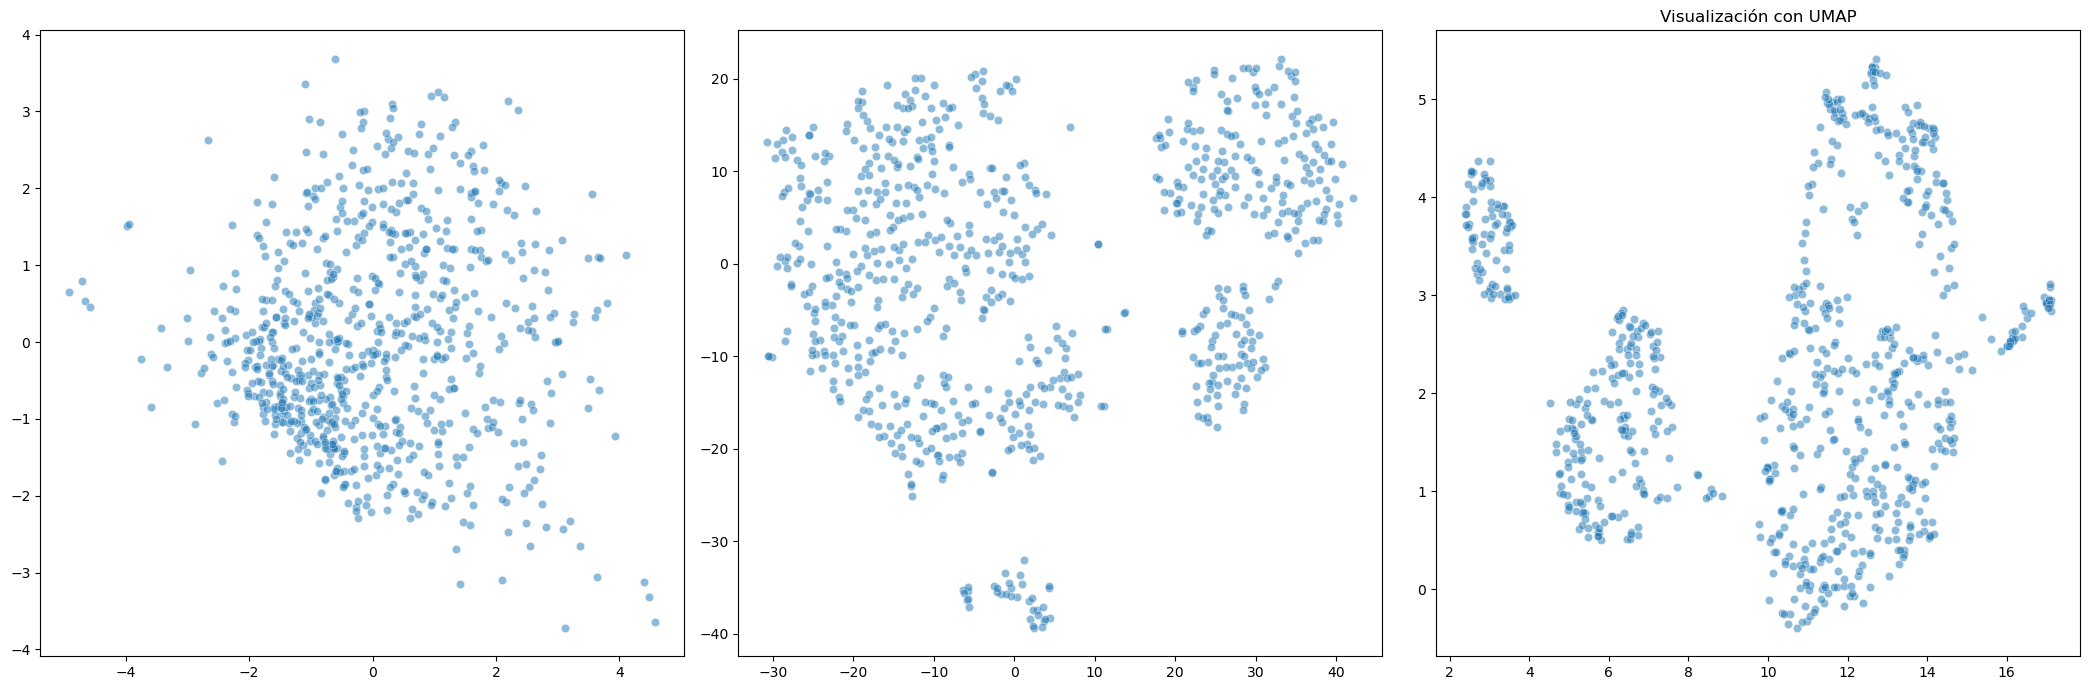

Mejores parámetros DBSCAN:
eps = 9.211
min_samples = 18


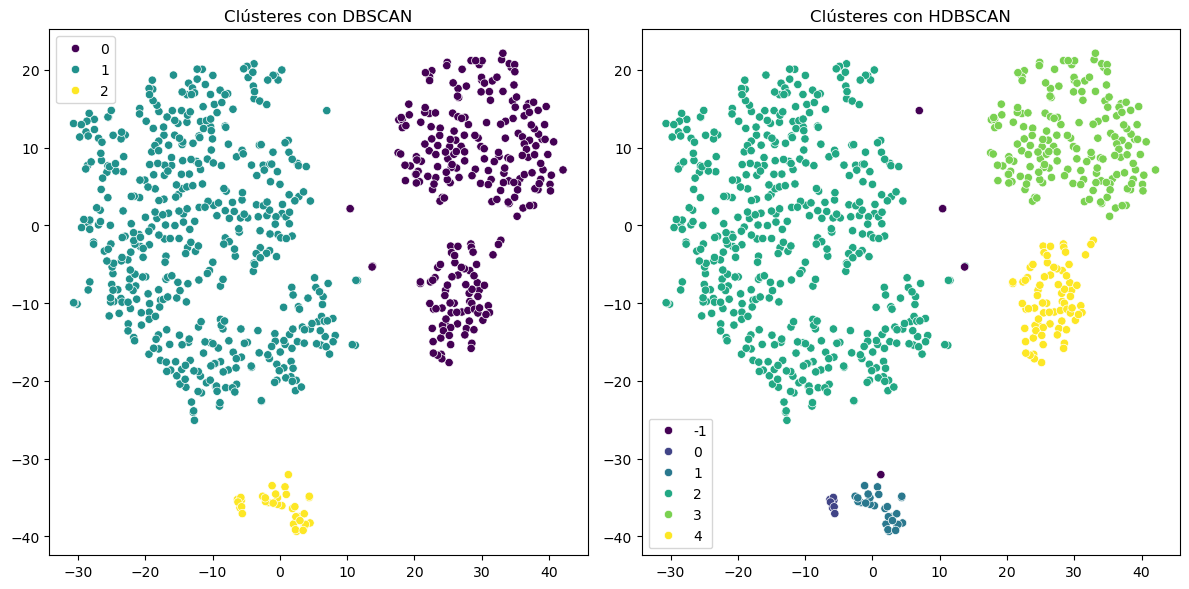

DBSCAN - Índice de Silueta: 0.48, Davies-Bouldin: 0.59
HDBSCAN - Índice de Silueta: 0.33, Davies-Bouldin: 0.90
Pacientes atípicos según Isolation Forest:
Index([  4,   7,   8,   9,  12,  13,  15,  16,  18,  24,
       ...
       691, 695, 703, 706, 715, 740, 744, 753, 759, 763],
      dtype='int64', length=140)

Pacientes atípicos según One-Class SVM:
Index([  2,   4,   6,   7,   8,   9,  11,  12,  13,  15,
       ...
       747, 749, 750, 753, 755, 757, 759, 761, 762, 763],
      dtype='int64', length=383)


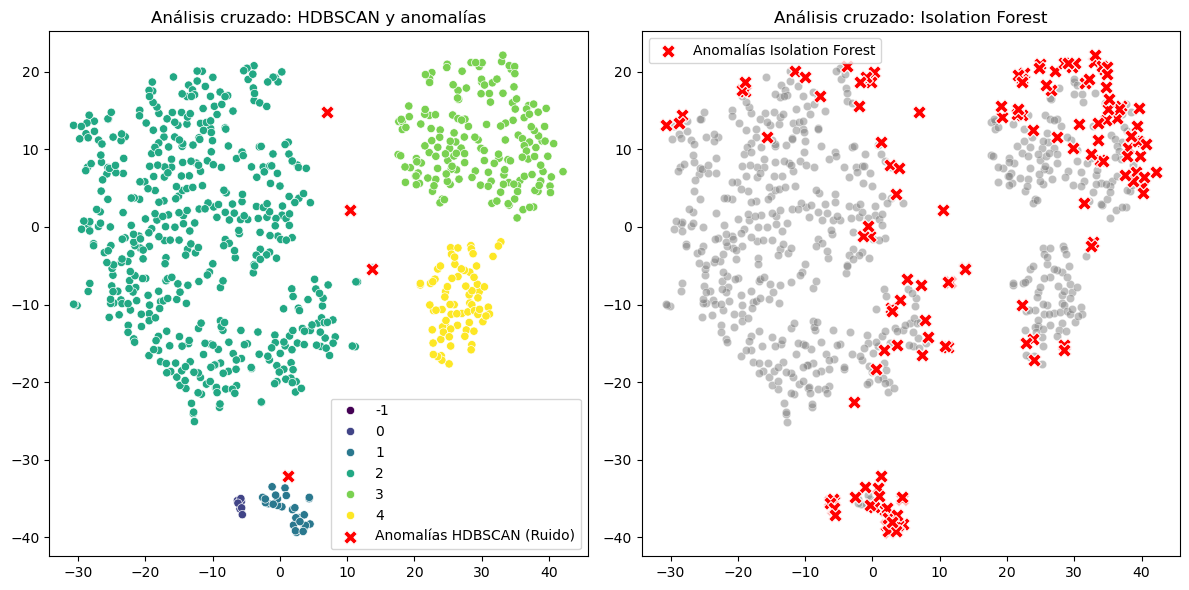

Análisis de coincidencias:
Número de anomalías que coinciden entre HDBSCAN (ruido) e Isolation Forest: 4


In [18]:
if __name__ == "__main__":
    # 1. Preprocesamiento y reducción de dimensionalidad
    df_pacientes = importar_dataset()
    datos_escalados, _ = preprocesar_datos(df_pacientes)
    datos_pca, datos_tsne, datos_umap = reducir_dimensionalidad(datos_escalados)

    # 2. Segmentación (clustering)
    # Se utiliza la salida de t-SNE para la segmentación, ya que suele ser mejor para la visualización de clústeres
    etiquetas_dbscan, etiquetas_hdbscan = segmentar_dbscan_hdbscan(datos_tsne)

    # 3. Detección de anomalías
    anomalias_iso, anomalias_svm, df_anomalias = detectar_anomalias(
        datos_escalados, df_pacientes.copy()
    )

    # 4. Análisis cruzado
    analisis_cruzado(
        df_pacientes,
        etiquetas_dbscan,
        etiquetas_hdbscan,
        anomalias_iso,
        anomalias_svm,
        datos_tsne,
    )

## Conclusiones sobre Clustering y Detección de Atípicos

### Resultados de Clustering

| Método  | Índice de Silueta | Davies-Bouldin |
|---------|-------------------|----------------|
| DBSCAN  | 0.48              | 0.59           |
| HDBSCAN | 0.33              | 0.90           |

- **Índice de Silueta**: Mide la cohesión y separación de los clusters, con valores cercanos a 1 indicando buena calidad. DBSCAN (0.48) presenta una mejor separación y cohesión que HDBSCAN (0.33).
- **Davies-Bouldin**: Mide la separación entre clusters; valores más bajos indican clusters más compactos y bien separados. DBSCAN (0.59) también muestra mejor desempeño frente a HDBSCAN (0.90).

**Conclusión:**  
DBSCAN presenta un rendimiento superior en la agrupación de pacientes en comparación con HDBSCAN según ambas métricas, sugiriendo clusters más definidos y diferenciados.

---

### Detección de Pacientes Atípicos

- **Isolation Forest:** Detecta 140 pacientes atípicos.
- **One-Class SVM:** Detecta 383 pacientes atípicos.

### Análisis de coincidencias con HDBSCAN (ruido)

- Número de anomalías coincidentes entre el ruido detectado por HDBSCAN y los atípicos detectados por Isolation Forest: **2**.

---

### Análisis de Interpretabilidad

- **Isolation Forest:** Generalmente más interpretable gracias a su mecanismo basado en aislamiento mediante árboles, lo que facilita entender por qué un punto es considerado anómalo.
- **HDBSCAN:** Excelente para encontrar clusters con densidades variables y su concepto de "ruido" suele coincidir con anomalías reales, aunque la interpretación exacta puede ser menos directa.
- **One-Class SVM:** Más complejo y menos intuitivo, dificultando la interpretación clínica o práctica de los pacientes catalogados como atípicos.

---

## Consideraciones Finales

- DBSCAN ofrece una mejor calidad de clustering que HDBSCAN, lo que puede ayudar a segmentar mejor a los pacientes para análisis posteriores.
- La baja coincidencia entre las anomalías detectadas por HDBSCAN (ruido) e Isolation Forest sugiere que cada método identifica diferentes tipos de casos atípicos.
- One-Class SVM detecta muchos más pacientes atípicos, pero su complejidad y baja interpretabilidad aconsejan validar cuidadosamente sus resultados.
- Se recomienda complementar con validaciones adicionales para elegir el método de detección más adecuado según el contexto clínico y la utilidad práctica.

---

**Autor**: Henzo Alejandro Arrué Muñoz

---